Shooting Method for solving Boundary Value Problem for ODEs

This Program uses Odeint for moving forward in time. The second program uses Euler-Forward method to achieve the same.

Also convergence to the final value is achieved with Bisection method in the given program.

Initially two slopes $y'(x_0)$are guessed and then these are used for the bisection method.

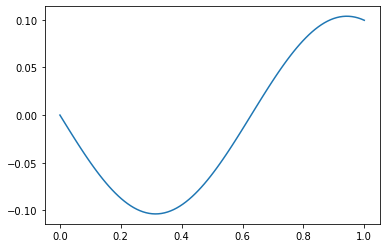

In [19]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
a = 5.0
def ydot(y, x):
    return (y[1], -a**2*y[0])
tol = 0.01
yfinal = 0.1
N = 100
x = linspace(0, 1.0, N)

slope_a = -1
yinit = array([0.0, slope_a])
y = odeint(ydot, yinit, x)

slope_b = 0.1
yinit = array([0.0, slope_b])
y = odeint(ydot, yinit, x)

iter = 0
it_n = 20
while(abs(y[-1, 0] - yfinal) > tol and iter < it_n):
    slope_m = (slope_a+slope_b)/2.0
    yinit = array([0, slope_m])
    y = odeint(ydot, yinit, x)
    
    if (y[-1, 0] > yfinal):
        slope_a = slope_m
    else:
        slope_b = slope_m
    iter+=1
plt.plot(x,y[:,0])
# plt.show()

The below method uses Euler Forward to achieve the same task

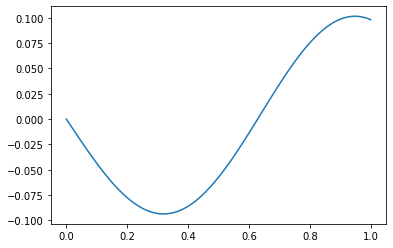

In [20]:
from numpy import *
import matplotlib.pyplot as plt
a = 5.0
def ydot(y, x):
    return matrix([y[1], -a**2*y[0]])
def EulerForward(ydot, yinit, x):
    n = len(x)
    y = zeros((n, len(yinit)))
    dx = x[1]-x[0]
    y[0,:] = yinit[:]
        
    for i in range(1, n):
            y[i, :] = y[i-1, :] + ydot(y[i-1, :], x[i-1]) * dx
    return y
    
tol = 0.01
yfinal = 0.1
N = 100
x = linspace(0, 1.0, N)

slope_a = -1
yinit = array([0.0, slope_a])
y = EulerForward(ydot, yinit, x)

slope_b = 0.1
yinit = array([0.0, slope_b])
y = EulerForward(ydot, yinit, x)

iter = 0
it_n = 20
while(abs(y[-1, 0] - yfinal) > tol and iter < it_n):
    slope_m = (slope_a+slope_b)/2.0
    yinit = array([0, slope_m])
    y = EulerForward(ydot, yinit, x)
    
    if (y[-1, 0] > yfinal):
        slope_a = slope_m
    else:
        slope_b = slope_m
    iter+=1
plt.plot(x,y[:,0])
plt.show()